In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import os
from datetime import datetime

In [7]:
datapath='../Summary_and_plot_script/input/CANO20221001.csv'
dff=pd.read_csv(datapath)
df_ocean=dff

unique_categories = dff['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1] Type'].value_counts()
dff

/var/folders/g8/m0fg5h2j2jn0jc5nwl_l0fvh0000gn/T/ipykernel_85024/4177297361.py:2: DtypeWarning: Columns (3,7,15,19,23,27,31,35,47,50,55,58,61,70,79,82) have mixed types. Specify dtype option on import or set low_memory=False.
  dff=pd.read_csv(datapath)


,Date/Time,Longitude,Longitude QC Flag,Longitude QC Comment,Longitude Type,Latitude,Latitude QC Flag,Latitude QC Comment,Latitude Type,Depth [m],...,drip 1 QC Comment,equ pump,equ pump QC Flag,equ pump QC Comment,Oxygen,Oxygen QC Flag,Oxygen QC Comment,Saturation,Saturation QC Flag,Saturation QC Comment
0,2022-10-01T04:02:50.000Z,1.095,2,NaN,M,40.406,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,0.000,2.0,NaN,0.000,2.0,NaN
1,2022-10-01T04:04:18.000Z,1.089,2,NaN,M,40.403,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,0.000,2.0,NaN,0.000,2.0,NaN
2,2022-10-01T04:05:46.000Z,1.083,2,NaN,M,40.399,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,0.000,2.0,NaN,0.000,2.0,NaN
3,2022-10-01T04:07:14.000Z,1.077,2,NaN,M,40.396,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,0.000,2.0,NaN,0.000,2.0,NaN
4,2022-10-01T04:08:43.000Z,1.072,2,NaN,M,40.392,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,0.000,2.0,NaN,0.000,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74712,2023-03-22T09:45:47.000Z,-15.418,2,NaN,M,28.131,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,266.682,2.0,NaN,95.409,2.0,NaN
74713,2023-03-22T09:47:12.000Z,-15.418,2,NaN,M,28.131,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,266.583,2.0,NaN,95.355,2.0,NaN
74714,2023-03-22T09:51:07.000Z,-15.418,2,NaN,M,28.131,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,266.707,2.0,NaN,95.346,2.0,NaN
74715,2023-03-22T09:52:33.000Z,-15.418,2,NaN,M,28.131,2,NaN,M,5.0,...,NaN,104.0,2.0,NaN,266.556,2.0,NaN,95.313,2.0,NaN


In [27]:
# Assuming dff is your DataFrame
# Find consecutive sequences of 'M' in 'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1] Type'
sequences = (dff['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1] Type'] != dff['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1] Type'].shift()).cumsum()

# Filter rows where 'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1] Type' is 'M'
m_sequences = dff[dff['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1] Type'] == 'M']

# Group by consecutive sequences and calculate the required values
df_oc_filtered = m_sequences.groupby(sequences).agg({
    'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]': 'std',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Date/Time': 'first'
})

# Reset the index to get a clean DataFrame if needed
df_oc_filtered.reset_index(drop=True, inplace=True)

# Print the result
print(df_oc_filtered)



     xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]  Latitude  \
0                                             0.530488        40.2418   
1                                             0.329177        39.8030   
2                                             0.753060        39.5082   
3                                             0.116682        38.9062   
4                                             0.235717        38.3296   
..                                                 ...            ...   
669                                           0.096451        30.0480   
670                                           0.131842        29.5388   
671                                           0.105405        29.0172   
672                                           0.116322        28.6132   
673                                           0.065580        28.1880   

     Longitude                 Date/Time  
0       0.8082  2022-10-01T05:12:59.000Z  
1       0.1185  2022-10-01T08:15:15.0

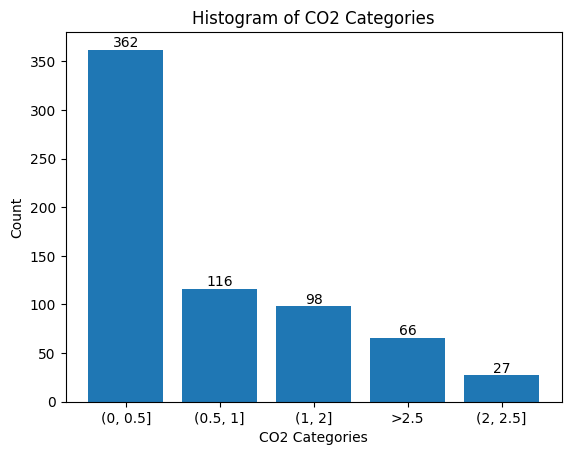

In [28]:
# Assuming 'result' is your DataFrame with calculated values
# Define custom bins
bins = [0, 0.5, 1, 2, 2.5, float('inf')]

# Categorize 'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]' into specified bins
df_oc_filtered['CO2 Categories'] = pd.cut(df_oc_filtered['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]'], bins=bins, labels=['(0, 0.5]', '(0.5, 1]', '(1, 2]', '(2, 2.5]', '>2.5'])

# Count the occurrences in each category
category_counts = df_oc_filtered['CO2 Categories'].value_counts()

# Create a bar plot (histogram) of the CO2 categories
plt.bar(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('CO2 Categories')
plt.ylabel('Count')
plt.title('Histogram of CO2 Categories')

# Add the number of observations on top of each bar
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()




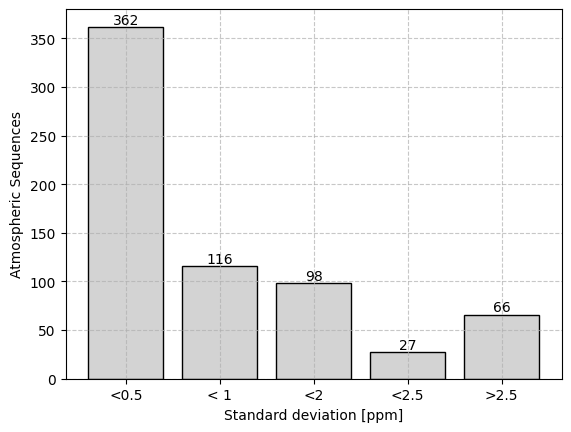

In [54]:
co2_values=df_oc_filtered['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]']

# Assuming df_oc_filtered is your DataFrame with calculated values
# Define custom bins and categories
bins = [0, 0.5, 1, 2, 2.5, float('inf')]
categories = ['<0.5', '< 1', '<2', '<2.5', '>2.5']

# Categorize 'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]' into specified bins
df_oc_filtered['CO2 Categories'] = pd.cut(df_oc_filtered['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]'], bins=bins, labels=categories)

# Count the occurrences in each category
category_counts = df_oc_filtered['CO2 Categories'].value_counts()

# Set the order of the x-axis labels to be the same as the categories list
order = categories

# Create a bar plot (histogram) of the CO2 categories with specified order
plt.bar(order, category_counts[order], color='lightgray', edgecolor='black')

# Add the number of observations on top of each bar
for i, count in enumerate(category_counts[order]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)



# Set labels and title
plt.xlabel('Standard deviation [ppm]')
plt.ylabel('Atmospheric Sequences')
# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/VOS_STD_script_for_labelling_report/output/CanOA_atm_ocean_comparison_std.png"
# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

In [56]:

# URL of the text file
url = "https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_izo_surface-flask_1_ccgg_event.txt"

# Send a GET request to the URL and get the content of the file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the content of the response into a pandas DataFrame, skipping the first 160 lines
    data = StringIO(response.text)
    df = pd.read_csv(data, skiprows=160, delimiter=r"\s+", comment='#', header=None)

    # Define column names based on the VARIABLE ORDER header
    column_names = ["site_code", "year", "month", "day", "hour", "minute", "second",
                    "datetime", "time_decimal", "air_sample_container_id", "value",
                    "value_unc", "latitude", "longitude", "altitude", "elevation",
                    "intake_height", "method", "event_number", "instrument", "analysis_datetime",
                    "qcflag"]

    # Assign column names to the DataFrame
    df.columns = column_names

    # Now 'df' contains the data from the text file as a pandas DataFrame
   

from datetime import datetime, timedelta
# Convert the 'datetime' column to datetime objects and set the timezone to UTC
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_convert('UTC')

# Define the start and end dates in the format 'YYYY-MM-DD'
start_date_str = '2022-10-01'
end_date_str = '2023-03-31'

# Convert start and end dates to datetime objects and set the timezone to UTC
start_date = pd.to_datetime(start_date_str).tz_localize('UTC')
end_date = (pd.to_datetime(end_date_str) + timedelta(days=1)).tz_localize('UTC')  # Adding one day to include end_date

# Select rows between start_date and end_date
df_atm = df[(df['datetime'] >= start_date) & (df['datetime'] < end_date)]

<Figure size 600x600 with 0 Axes>

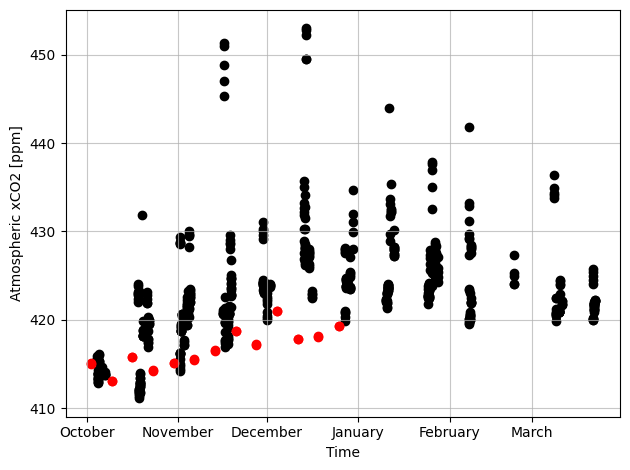

In [57]:
import matplotlib.dates as mdates
# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

df_ocean=df_ocean[df_ocean['Longitude'] < -12]
df_ocean=df_ocean[df_ocean['Latitude'] < 36]
dt=pd.to_datetime(df_ocean['Date/Time'])

x1 = dt
y1 = df_ocean['xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]'].values
x2 = df_atm['datetime']
y2 = df_atm['value'].values

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first variable
ax.scatter(x1, y1, color='black')

# Plot the second variable, sharing the y-axis
ax.scatter(x2, y2, color='red')

ax.set_ylabel('Atmospheric xCO2 [ppm]')
ax.set_xlabel('Time')
# Add grid (both major and minor axis)
plt.grid( linestyle='-', alpha=0.7, which='both')

# Set the x-axis ticks to display month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # %B displays full month name

fig.tight_layout()

# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/VOS_STD_script_for_labelling_report/output/CanOA_atm_ocean_comparison.png"
# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')


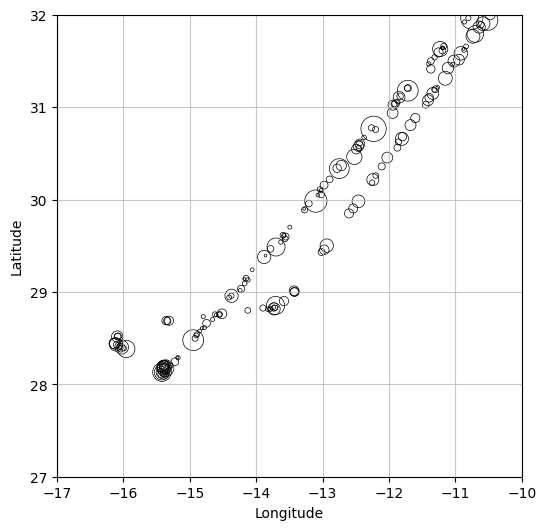

In [58]:
# Assuming df_ocean is your DataFrame
latitudes = df_oc_filtered['Latitude']
longitudes = df_oc_filtered['Longitude']
# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Create a scatter plot with latitude and longitude
plt.scatter(longitudes,latitudes,linewidths=0.5, s=70*co2_values,marker='o', color='blue', edgecolors='black', facecolor='none', label='Data Points')
plt.xlim([-17,-10])
plt.ylim([27, 32])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
# Add grid (both major and minor axis)
plt.grid( linestyle='-', alpha=0.7, which='both')

# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/VOS_STD_script_for_labelling_report/output/CanOA_atm_ocean_std_map.png"
# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')